In [26]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('G:/다른 컴퓨터/내 컴퓨터/구글 드라이브 백업/학석사/부산대 금융 공동연구/df_case_clean_0508.xlsx')
df = df.iloc[:,:7]
df

,보도일,total,1,2,3,4,5
0,2020-01-30,1,0,0,0,1,0
1,2020-01-31,3,0,2,0,1,0
2,2020-02-01,0,0,0,0,0,0
3,2020-02-02,1,0,0,1,0,0
4,2020-02-03,0,0,0,0,0,0
...,...,...,...,...,...,...,...
826,2022-05-05,42268,8316,9771,9269,8267,6645
827,2022-05-06,26686,5648,6204,5719,5273,3842
828,2022-05-07,39574,7683,8916,8535,8189,6251
829,2022-05-08,40048,7875,8680,8483,8237,6773


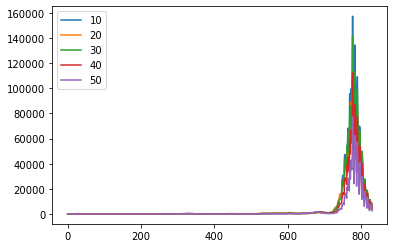

In [27]:
plt.plot(df.iloc[:,2], label = '10')
plt.plot(df.iloc[:,3], label = '20')
plt.plot(df.iloc[:,4], label = '30')
plt.plot(df.iloc[:,5], label = '40')
plt.plot(df.iloc[:,6], label = '50')
plt.legend()
plt.show()

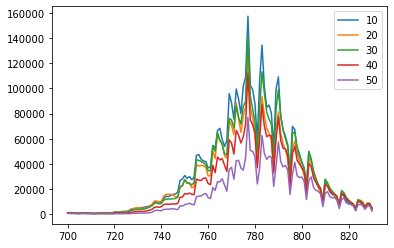

In [28]:
plt.plot(df.iloc[700:,2], label = '10')
plt.plot(df.iloc[700:,3], label = '20')
plt.plot(df.iloc[700:,4], label = '30')
plt.plot(df.iloc[700:,5], label = '40')
plt.plot(df.iloc[700:,6], label = '50')
plt.legend()
plt.show()

In [29]:
new_df = df.iloc[700:,2:].reset_index()
new_df = new_df.iloc[:,1:]  # 보도일 날림

In [56]:
# 10대의 영향(7일별)
cor_10 = []
cor_20 = []
cor_30 = []
cor_40 = []

for i in range(120):
        cor_10.append(np.corrcoef(new_df.iloc[i:i+6,0], new_df.iloc[i+5:i+11, 1])[1][0])
        cor_10.append(np.corrcoef(new_df.iloc[i:i+6,0], new_df.iloc[i+5:i+11, 2])[1][0])
        cor_10.append(np.corrcoef(new_df.iloc[i:i+6,0], new_df.iloc[i+5:i+11, 3])[1][0])
        cor_10.append(np.corrcoef(new_df.iloc[i:i+6,0], new_df.iloc[i+5:i+11, 4])[1][0])

for i in range(120):
    cor_20.append(np.corrcoef(new_df.iloc[i:i+6,1], new_df.iloc[i+5:i+11, 2])[1][0])
    cor_20.append(np.corrcoef(new_df.iloc[i:i+6,1], new_df.iloc[i+5:i+11, 3])[1][0])
    cor_20.append(np.corrcoef(new_df.iloc[i:i+6,1], new_df.iloc[i+5:i+11, 4])[1][0])
    
for i in range(120):
    cor_30.append(np.corrcoef(new_df.iloc[i:i+6,2], new_df.iloc[i+5:i+11, 3])[1][0])
    cor_30.append(np.corrcoef(new_df.iloc[i:i+6,2], new_df.iloc[i+5:i+11, 4])[1][0])
    
for i in range(120):
    cor_40.append(np.corrcoef(new_df.iloc[i:i+6, 3], new_df.iloc[i+5:i+11, 4])[1][0])
 

In [57]:
cor_10 = np.array(cor_10).reshape(-1,4)
cor_20 = np.array(cor_20).reshape(-1,3)
cor_30 = np.array(cor_30).reshape(-1,2)
cor_40 = np.array(cor_40).reshape(-1,1)

cor_10 = pd.DataFrame(cor_10, columns = [12,13,14,15])
cor_20 = pd.DataFrame(cor_20, columns = [23,24,25])
cor_30 = pd.DataFrame(cor_30, columns = [34, 35])
cor_40 = pd.DataFrame(cor_40, columns = [45])

In [58]:
cor_20 = cor_20.join(cor_10, how = 'inner')
cor_30 = cor_30.join(cor_20, how = 'inner')
cor_40 = cor_40.join(cor_30, how = 'inner')
cor_40 = np.abs(cor_40)

In [59]:
for i in range(len(cor_40)):
    for j in range(len(cor_40.columns)):
        if cor_40.iat[i,j] > 0.9:
            cor_40.iat[i,j] = 2

        elif cor_40.iat[i,j] > 0.7:
            cor_40.iat[i,j] = 1
        
        else:
            cor_40.iat[i,j] = 0
            
cordf = cor_40
lst = np.array(np.sum(cordf));lst

array([18., 31., 21., 28., 26., 12., 35., 50., 44., 30.])

In [63]:
graph_lst = []
for i in range(0,111,10):
    result = np.array(np.sum(cordf.iloc[i:i+10,:]))
    g = nx.Graph()
    g.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)])
    
    pos = {}
    pos[1] = (0,0)
    pos[2] = (2,0)
    pos[3] = (1,1)
    pos[4] = (0,2)
    pos[5] = (2,2)
    graph_lst.append(g)

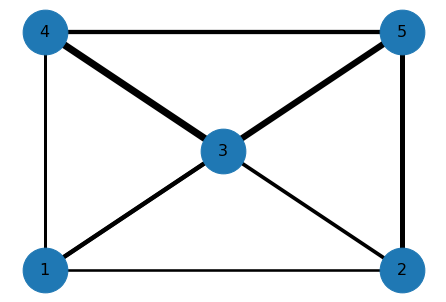

In [61]:
g = nx.Graph()
g.add_edges_from([(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)])
pos = {}
pos[1] = (0,0)
pos[2] = (2,0)
pos[3] = (1,1)
pos[4] = (0,2)
pos[5] = (2,2)
nx.draw(g, pos, with_labels = True, font_size = 16, node_size = 2000, width = lst/7)

In [51]:
nx.write_gexf(g,'gephi_covid.gexf')

In [64]:
graph_lst